## Callin Switzer
## train NN with Jorge's new data
## 23 Aug 2018

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
from datetime import datetime
import sys
import csv
import seaborn as sns
import scipy.io
import subprocess
import csv

from matplotlib.ticker import ScalarFormatter

import tensorflow as tf
print("TensorFlow successfully installed.")
if tf.test.is_built_with_cuda():
    print("The installed version of TensorFlow includes GPU support.")

print(sys.version, "\n")

now = datetime.now()
print("last run on " + str(now))

#%qtconsole

# define directories
baseDir = os.getcwd()
dataDir = r'D:\MothSimulations\11c-AggressiveManeuver\Qstore\hws_am_con'
figDir = r'D:\Dropbox\mothMachineLearning_dataAndFigs\Figs'
dataOutput = r'D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput'
savedModels = r'D:\Dropbox\mothMachineLearning_dataAndFigs\savedModels'
if not os.path.exists(dataOutput):
    os.mkdir(dataOutput)

if not os.path.exists(savedModels):
    os.mkdir(savedModels)
    
# open file explorer
# aa = r'explorer /select,"'
# subprocess.Popen(str(aa + figDir + '\"'))
# subprocess.Popen(str(aa + dataDir + '\"'))

C:\Users\calli\Anaconda3\envs\deeplearning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow successfully installed.
The installed version of TensorFlow includes GPU support.
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)] 

last run on 2018-10-02 08:07:39.907157


In [2]:
# import custom Utils functions
from DeepLearningUtils import *

TensorFlow successfully installed.
The installed version of TensorFlow includes GPU support.
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)] 

last run on 2018-10-02 08:07:39.924284


In [3]:
dataDir2 = r"D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput"
dataFiles = [x for x in listdir_fullpath(dataDir2) if  x.endswith("con.hdf5")]
print(len(dataFiles))
dataFiles

40


['D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_10_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_11_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_12_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_13_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_14_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_15_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_16_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_17_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_18_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_19_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_1_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearnin

In [4]:
# dfList = []

# for dataFile in dataFiles:
#     bf2 = pd.read_hdf(dataFile, "data")
#     bf2[['simNum', 'timestep']] = bf2[['simNum', 'timestep']].astype(int)
#     bf2['count'] = bf2.groupby(["simNum", "timestep"]).cumcount()
#     sdf = bf2.loc[(bf2["count"] == 0) | (bf2["count"] == 99), :]
#     ss = sdf.pivot_table(index=['simNum', 'timestep'], columns = "count",aggfunc='first')
#     ss.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in ss.columns]
#     ss.reset_index(inplace=True) 
#     dfList.append(ss)
#     print(dataFile)

# trainDF = pd.concat(dfList)

# trainDF = trainDF.drop(columns=['F_99', 'alpha_99', 
#                                'tau_99'])
# trainDF=trainDF.rename(columns = {'F_0':'F', 
#                                  "alpha_0": "alpha", 
#                                  "tau_0": "tau"})

# trainDF.reset_index(inplace = True, drop = True)
# print(trainDF.shape)
# trainDF.head()

# trainDF.sort_values(["timestep", "simNum"], ascending = [True, True]).head()

# trainDF.columns

# # convert to fx and fy
# trainDF["Fx"] = trainDF.F * np.cos(trainDF.alpha)
# trainDF["Fy"] = trainDF.F * np.sin(trainDF.alpha)

In [5]:
#trainDF.head()

In [6]:
# # save training dataset, so it's faster to read in next time
# trainDF.to_csv(os.path.join(dataDir2, "smallDF.csv"), index=False)

In [7]:
trainDF2 = pd.read_csv(os.path.join(dataDir2, "smallDF.csv"))
trainDF2.head()

,simNum,timestep,F,alpha,phi_0,phi_99,phi_dot_0,phi_dot_99,tau,theta_0,...,x_0,x_99,x_dot_0,x_dot_99,y_0,y_99,y_dot_0,y_dot_99,Fx,Fy
0,0,0,38304.433962,5.340270,3.926991,3.869604,0.000000,-5.674295,10963.268558,0.785398,...,0.000000,6.853314,0.000100,683.734561,0.000000,-1.298536,0.000100,-133.752363,22501.211072,-30998.792903
1,0,1,34264.536249,2.465501,3.948428,4.019544,2.009397,5.425513,72580.767201,0.768478,...,-0.019322,-6.079672,-0.145396,-606.129200,2.520087,6.366770,250.908304,120.273149,-26727.166452,21441.012519
2,0,2,12045.791872,4.573819,3.966608,3.933017,-0.124272,-2.775517,93435.855346,0.768515,...,0.509507,2.986736,52.490438,193.914740,4.834518,2.470847,-18.848146,-211.050011,-1663.845687,-11930.327714
3,0,3,35562.854879,0.767089,4.000007,4.111777,3.434103,7.246049,-96088.338473,0.773977,...,-0.836633,-4.334782,-187.046694,-157.064454,6.838940,17.508792,218.755312,844.589134,25602.909376,24682.132781
4,0,4,20856.636628,2.424378,4.009324,3.995061,-2.309667,0.686804,-27142.805375,0.815904,...,0.429770,2.895126,313.730247,-65.350386,8.392823,6.771320,-58.222983,-102.458917,-15718.389244,13708.812166


# Keras models

In [8]:
# make dataset

# refref: add dots as output

X = trainDF2.loc[:, ["x_0", "y_0", "phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"]]

Y = trainDF2.loc[:, ["Fx", "Fy", "tau", "x_dot_99", "y_dot_99", 
                    "phi_dot_99", "theta_dot_99"] ]

# # # subtract x_0 and y_0 from everything
# X.x_99 = X.x_99 - X.x_0
# X.y_99 = X.y_99 - X.y_0

# X.x_0 = X.y_0 = 0

In [9]:
X.head()

,x_0,y_0,phi_0,theta_0,x_99,y_99,phi_99,theta_99,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0
0,0.000000,0.000000,3.926991,0.785398,6.853314,-1.298536,3.869604,0.746382,0.000100,0.000100,0.000000,0.000000
1,-0.019322,2.520087,3.948428,0.768478,-6.079672,6.366770,4.019544,0.940422,-0.145396,250.908304,2.009397,0.087406
2,0.509507,4.834518,3.966608,0.768515,2.986736,2.470847,3.933017,0.868402,52.490438,-18.848146,-0.124272,-1.029996
3,-0.836633,6.838940,4.000007,0.773977,-4.334782,17.508792,4.111777,0.747358,-187.046694,218.755312,3.434103,2.037211
4,0.429770,8.392823,4.009324,0.815904,2.895126,6.771320,3.995061,0.761962,313.730247,-58.222983,-2.309667,-0.673328


In [10]:
Y.head()

,Fx,Fy,tau,x_dot_99,y_dot_99,phi_dot_99,theta_dot_99
0,22501.211072,-30998.792903,10963.268558,683.734561,-133.752363,-5.674295,-4.770986
1,-26727.166452,21441.012519,72580.767201,-606.129200,120.273149,5.425513,10.479995
2,-1663.845687,-11930.327714,93435.855346,193.914740,-211.050011,-2.775517,3.897680
3,25602.909376,24682.132781,-96088.338473,-157.064454,844.589134,7.246049,0.318982
4,-15718.389244,13708.812166,-27142.805375,-65.350386,-102.458917,0.686804,-1.304712


In [11]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state = 123)

In [12]:
from sklearn.preprocessing import StandardScaler  
scalerX = StandardScaler()  
scalerY = StandardScaler()  

# Don't cheat - fit only on training data
scalerX.fit(Xtrain)  
scalerY.fit(Ytrain) 

Xtrain_scaled = scalerX.transform(Xtrain)  
Ytrain_scaled = scalerY.transform(Ytrain)  

# apply same transformation to test data
Xtest_scaled = scalerX.transform(Xtest)
Ytest_scaled = scalerY.transform(Ytest)

In [13]:
pd.DataFrame(scalerY.inverse_transform(Ytrain_scaled)).head()

,0,1,2,3,4,5,6
0,4921.410286,-29472.860520,-43474.926597,567.926777,-88.040935,-4.418419,-7.368523
1,11498.075007,2931.787592,30830.482492,444.337367,2.489686,-2.655246,-0.479400
2,4137.565172,-4224.449916,90265.867970,193.859357,217.524718,-0.423825,5.993808
3,-34932.224981,-25717.453464,38308.396523,12.065647,-910.281258,-3.621573,-0.800979
4,-10521.307892,31032.192025,-79689.073081,-853.024376,208.355764,6.069526,0.281335


In [14]:
pd.DataFrame(Ytrain).reset_index(drop = True).head()

,Fx,Fy,tau,x_dot_99,y_dot_99,phi_dot_99,theta_dot_99
0,4921.410286,-29472.860520,-43474.926597,567.926777,-88.040935,-4.418419,-7.368523
1,11498.075007,2931.787592,30830.482492,444.337367,2.489686,-2.655246,-0.479400
2,4137.565172,-4224.449916,90265.867970,193.859357,217.524718,-0.423825,5.993808
3,-34932.224981,-25717.453464,38308.396523,12.065647,-910.281258,-3.621573,-0.800979
4,-10521.307892,31032.192025,-79689.073081,-853.024376,208.355764,6.069526,0.281335


In [12]:
# from sklearn.preprocessing import MinMaxScaler  
# scalerX = MinMaxScaler()  
# scalerY = MinMaxScaler()  

# # Don't cheat - fit only on training data
# scalerX.fit(Xtrain)  
# scalerY.fit(Ytrain) 

# Xtrain_scaled = scalerX.transform(Xtrain)  
# Ytrain_scaled = scalerY.transform(Ytrain)  

# # apply same transformation to test data
# Xtest_scaled = scalerX.transform(Xtest)
# Ytest_scaled = scalerY.transform(Ytest)

In [13]:
# build Keras model with functional API, instead of Sequential
from keras.layers import Input, Dense
from keras.models import Model

# callcacks
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [ ]:
inputs = Input(shape=(Xtrain_scaled.shape[1],))

x = Dense(400, activation='tanh')(inputs)
x = Dense(400, activation='tanh')(x)
x = Dense(400, activation='tanh')(x)
x = Dense(16, activation='tanh')(x)
predictions = Dense(Ytrain_scaled.shape[1], activation='linear')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(loss="mse", optimizer="adam", metrics = ['mse'])

In [ ]:
earlystop = EarlyStopping(monitor='val_mean_squared_error', patience=50, 
                          verbose=1, mode='auto', min_delta = 0.001)

history = model.fit(Xtrain_scaled, Ytrain_scaled, validation_split = 0.3, 
                    verbose = 2, batch_size=2**14, epochs = 1000, 
                    callbacks = [earlystop])

In [ ]:
def plot_model_history(model_history, saveFig = False):
    fig, axs = plt.subplots(1,1,figsize=(10,5))
    # summarize history for accuracy
    axs.plot(range(1,len(model_history.history['mean_squared_error'])+1),
             model_history.history['mean_squared_error'])
    axs.plot(range(1,len(model_history.history['val_mean_squared_error'])+1),
             model_history.history['val_mean_squared_error'])
    axs.set_title('Model MSE')
    axs.set_ylabel('mean_squared_error')
    axs.set_xlabel('Epoch')
    axs.set_xticks(np.arange(1,len(model_history.history['val_mean_squared_error'])+1),
                   len(model_history.history['val_mean_squared_error'])/10)
    axs.legend(['train', 'val'], loc='best')
    if saveFig:
        fig.savefig(os.path.join(figDir, "ModelTraining.png"), dpi = 120, bbox_inches='tight')
    plt.show()

In [ ]:
plot_model_history(history, saveFig = False)

In [15]:
# load model
from keras.models import load_model
model = load_model(os.path.join(savedModels, 'my_model.h5'))

Using TensorFlow backend.


In [32]:
nnpreds = model.predict(Xtest_scaled[ :])

In [28]:
# save model
# model.save(os.path.join(savedModels, 'my_model.h5'))
# aa = r'explorer /select,"'
# subprocess.Popen(str(aa + savedModels + '\"'))

In [33]:
# rescale
nnpreds_unscaled = scalerY.inverse_transform(nnpreds)

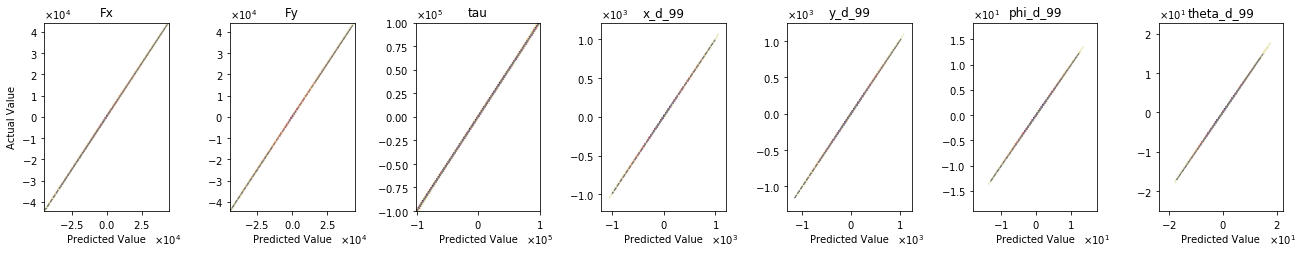

In [107]:
plt.close("all")
fig, axs = plt.subplots(1,7, figsize=np.array((20, 4)) / 1.1, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace=0.3)
#fig.suptitle('Predicted vs. acutal ', fontsize=14, fontweight='bold')

axs = axs.ravel()

nms = Y.columns
nms2 = [nms[ii].replace("dot", "d") for ii in range(len(nms))]
nms2

# replace lightest colors with white
import matplotlib.colors

cmap = plt.cm.magma_r
cmaplist = np.array([cmap(i) for i in range(cmap.N)])
#cmaplist[0:2] = np.repeat((0.0,0.0,0.0,0.0), 2).reshape(-1,4)
cmaplist[:,0:3] = np.divide(cmaplist[:, 0:3], 1.1)
#cmaplist[:,0:3] = np.transpose(np.vstack([np.linspace(1, 0, 256), np.linspace(1, 0, 256), np.linspace(1, 0, 256)]))
cmaplist[0] = (1,1,1,0.5)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm',cmaplist, cmap.N)

for ii in range(len(Y.columns)):
    # read in image
    
    try:
        axs[ii].hexbin(y = Ytest.iloc[:,ii],x = nnpreds_unscaled[:,ii], gridsize = 150, cmap = cmap)
        axs[ii].set_xlabel("Predicted Value")
        axs[ii].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        axs[ii].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        axs[ii].ticklabel_format(style='sci',  axis='both', scilimits=(3,4))
        t = axs[ii].xaxis.get_offset_text()
        t.set_x(1.1)
        t.set_y(0.5)
        if(ii == 0):
            axs[ii].set_ylabel("Actual Value")
        axs[ii].set_title(nms2[ii])
        axs[ii].plot(Ytest.iloc[0:1000,ii], Ytest.iloc[0:1000,ii], 'grey', linewidth = 1, linestyle  = "--")
    except:
        pass
plt.tight_layout()

fig.savefig(os.path.join(figDir, "NNPreds_newData_control_bigbatch_FxFy_hexbin_loadedModel.png"), dpi = 500, bbox_inches='tight')
# fig.savefig(os.path.join(figDir, "NNPreds_newData_control_bigbatch_FxFy_hexbin_loadedModel.svg"),bbox_inches='tight')

# residual plots

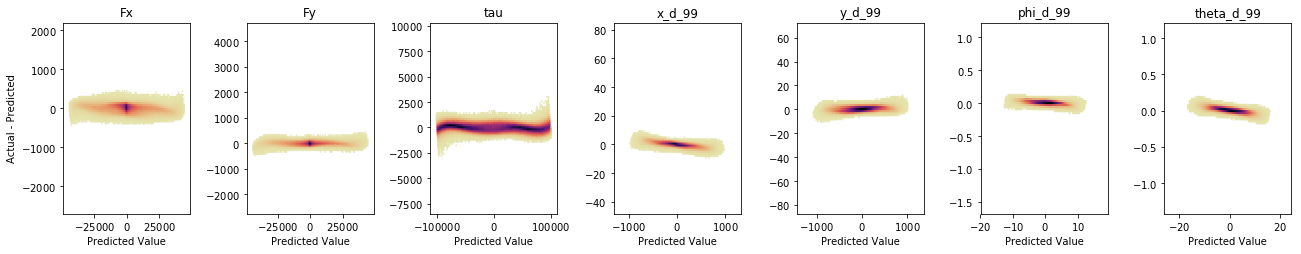

In [110]:
plt.close("all")
fig, axs = plt.subplots(1,7, figsize=np.array((20, 4)) / 1.1, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace=0.3)
#fig.suptitle('Predicted vs. acutal ', fontsize=14, fontweight='bold')

axs = axs.ravel()

nms = Y.columns
nms2 = [nms[ii].replace("dot", "d") for ii in range(len(nms))]
nms2

# replace lightest colors with white
import matplotlib.colors

cmap = plt.cm.magma_r
cmaplist = np.array([cmap(i) for i in range(cmap.N)])
#cmaplist[0:2] = np.repeat((0.0,0.0,0.0,0.0), 2).reshape(-1,4)
cmaplist[:,0:3] = np.divide(cmaplist[:, 0:3], 1.1)
#cmaplist[:,0:3] = np.transpose(np.vstack([np.linspace(1, 0, 256), np.linspace(1, 0, 256), np.linspace(1, 0, 256)]))
cmaplist[0] = (1,1,1,0.5)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm',cmaplist, cmap.N)

for ii in range(len(Y.columns)):
    # read in image
    
    try:
        axs[ii].hexbin(y = Ytest.iloc[:,ii] - nnpreds_unscaled[:,ii],x = nnpreds_unscaled[:,ii], gridsize = 150, cmap = cmap)
        axs[ii].set_xlabel("Predicted Value")
        axs[ii].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        axs[ii].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
#         axs[ii].ticklabel_format(style='sci',  axis='both', scilimits=(3,4))
#         t = axs[ii].xaxis.get_offset_text()
#         t.set_x(1.1)
#         t.set_y(0.5)
        if(ii == 0):
            axs[ii].set_ylabel("Actual - Predicted")
        axs[ii].set_title(nms2[ii])
        #axs[ii].plot(Ytest.iloc[0:1000,ii], Ytest.iloc[0:1000,ii], 'grey', linewidth = 1, linestyle  = "--")
    except:
        pass
plt.tight_layout()

fig.savefig(os.path.join(figDir, "NNPreds_resids.png"), dpi = 500, bbox_inches='tight')
# fig.savefig(os.path.join(figDir, "NNPreds_newData_control_bigbatch_FxFy_hexbin_loadedModel.svg"),bbox_inches='tight')

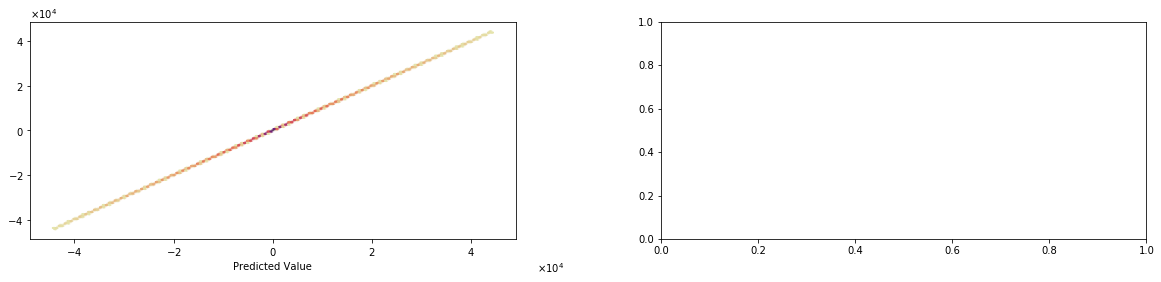

In [97]:
# convert Fx and Fy back to F and alpha

fig, axs = plt.subplots(1,2, figsize=(20, 4), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace=0.3)
ii = 0
axs[ii].hexbin(y = Ytest.iloc[:,ii],x = nnpreds_unscaled[:,ii], gridsize = 150, cmap = cmap)
axs[ii].set_xlabel("Predicted Value")
axs[ii].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[ii].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[ii].ticklabel_format(style='sci',  axis='both', scilimits=(0,0))
t = axs[ii].xaxis.get_offset_text()
t.set_x(1.1)
t.set_y(500)



['Fx', 'Fy', 'tau', 'x_d_99', 'y_d_99', 'phi_d_99', 'theta_d_99']

In [101]:
t

Text(1.1,21,'$\\times\\mathdefault{10^{1}}\\mathdefault{}$')

In [19]:
# calculate mean squared error

In [30]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [36]:
for ii in range(len(nms)):
    #np.sqrt(mean_squared_error(Ytest.iloc[0:1000,ii], nnpreds_unscaled[:,ii]))
    print(r2_score(Ytest.iloc[0:1000,ii], nnpreds_unscaled[:,ii]), nms[ii])

0.9999506847353872 Fx
0.9999627147331593 Fy
0.9999438044472624 tau
0.9999599609986949 x_dot_99
0.9999467703504513 y_dot_99
0.9999202305164062 phi_dot_99
0.9999309651201447 theta_dot_99


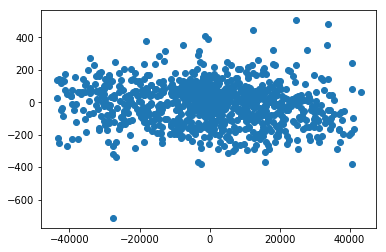

In [28]:
plt.scatter( nnpreds_unscaled[:,ii],Ytest.iloc[0:1000,ii]-  nnpreds_unscaled[:,ii])

In [ ]:
TestPreds = pd.DataFrame(nnpreds_unscaled, columns = Y.columns)
TestPreds.head()

In [ ]:
TestInput = pd.DataFrame(Xtest, columns = X.columns).reset_index(drop = True)
TestInput.head()

In [ ]:
# F will be the same in any quadrant

TestPreds["F"] = np.sqrt(TestPreds["Fx"]**2 + TestPreds["Fy"]**2)

# trainDF["Fx"] = trainDF.F * np.cos(trainDF.alpha)
# trainDF["Fy"] = trainDF.F * np.sin(trainDF.alpha)

In [ ]:
TestPreds.head()

In [ ]:
# calculate alpha
def quadrant(Fx, Fy):
    if (Fx >= 0) & (Fy >= 0):
        q = 1
    elif (Fx < 0) & (Fy >= 0):
        q = 2
    elif (Fx < 0) & (Fy < 0):
        q = 3
    elif (Fx >= 0) & (Fy < 0):
        q = 4
    else:
        q = 999999
    return(q)



In [ ]:
TestPreds["quadrant"] = [quadrant(fx, fy) for fx,fy in zip(TestPreds["Fx"], TestPreds["Fy"])]

In [ ]:
TestPreds.head()

In [ ]:
def angleCalc(Fx, Fy, q):
    fx = np.abs(Fx)
    fy = np.abs(Fy)
    
    if q == 1:
        alpha = np.arctan(fy/fx)
    elif q == 2:
        alpha = np.pi - np.arctan(fy/fx)
    elif q == 3: 
        alpha = np.pi + np.arctan(fy/fx)
    elif q == 4:
        alpha = (2*np.pi) - np.arctan(fy/fx)
    return(alpha)

In [ ]:
TestPreds["alpha"] = [angleCalc(fx, fy, q) for fx, fy, q in zip(TestPreds["Fx"], TestPreds["Fy"], TestPreds["quadrant"])]

In [ ]:
TestPreds.head()

In [ ]:
TestPredsComb = pd.concat([TestPreds, TestInput], axis = 1)

In [ ]:
TestPredsComb.head()

In [ ]:
TestPredsComb.rename(index=str, columns={"F": "F_pred", "alpha": "alpha_pred", "tau":"tau_pred"}, inplace=True)

In [ ]:
TestPredsComb.head()

In [ ]:
TestPredsComb.drop(['Fx', 'Fy', "quadrant"], axis=1, inplace = True)
TestPredsComb.head()

In [ ]:
cols= ['x_0', 'y_0', 'phi_0', 'theta_0', 
       'x_dot_0', 'y_dot_0', 'phi_dot_0', 'theta_dot_0', 
       'F_pred', 'alpha_pred', 'tau_pred', 
      'x_99', 'y_99', 'phi_99', 'theta_99', 
      'x_dot_99', 'y_dot_99', 'phi_dot_99', 'theta_dot_99' ]

In [ ]:
tc2 = TestPredsComb.loc[:, cols]
tc2.head()

In [ ]:
tc2.rename(columns = {"x_dot_99": "x_dot_99_pred", 
                     "y_dot_99": "y_dot_99_pred", 
                     "theta_dot_99": "theta_dot_99_pred", 
                     "phi_dot_99": "phi_dot_99_pred"}, inplace = True)
tc2.head()

In [ ]:
tc2.to_csv(os.path.join(dataOutput, "NNpreds.csv"), index = False)

In [ ]:
tc2.shape

In [ ]:
Xtrain.shape

In [ ]:

tc_sm =  tc2.sample(n=1000, random_state = 902902)
tc_sm.to_csv(os.path.join(dataOutput, "NNpreds_small.csv"), index = False)

In [ ]:
# check alpha on trainDf
trainDF2["quadrant"] = [quadrant(fx, fy) for fx,fy in zip(trainDF2["Fx"], trainDF2["Fy"])]

trainDF2["alphaCalc"] = [angleCalc(fx, fy, q) for fx, fy, q in zip(trainDF2["Fx"], trainDF2["Fy"], trainDF2["quadrant"])]

In [ ]:
trainDF2.loc[:, ["alpha", "alphaCalc"]].head()

In [ ]:
plt.close("all")
fig, axs = plt.subplots(2,int(len(Y.columns)/2), figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.3)
fig.suptitle('Predicted vs. acutal ', fontsize=14, fontweight='bold')

axs = axs.ravel()

nms = Y.columns

for ii in range(len(Y.columns)):
    # read in image
    
    try:
        axs[ii].scatter(y = Ytest.iloc[:,ii],x = nnpreds_unscaled[:,ii], s = 1, alpha = 0.1 )
        axs[ii].set_xlabel("Predicted Value (un-scaled)")
        if(ii == 0):
            axs[ii].set_ylabel("Actual Value\n(un-scaled)")
        axs[ii].set_title(nms[ii])
        axs[ii].plot(Ytest.iloc[:,ii], Ytest.iloc[:,ii], 'b')
    except:
        pass

    
fig.savefig(os.path.join(figDir, "NNPreds_newData_control_bigbatch_FxFy.png"), dpi = 120, bbox_inches='tight')

In [ ]:
Ytest.head()

In [ ]:
Xtest.head()

In [ ]:
# refref: idea - predict whole paths, rather than just the endpoint

In [ ]:
plt.close("all")
fig, axs = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.3)
fig.suptitle('Predicted vs. acutal ', fontsize=14, fontweight='bold')

axs = axs.ravel()

nms = ["Fx", "Fy", "tau"]


# replace lightest colors with white
import matplotlib.colors

cmap = plt.cm.magma_r
cmaplist = np.array([cmap(i) for i in range(cmap.N)])
#cmaplist[0:2] = np.repeat((0.0,0.0,0.0,0.0), 2).reshape(-1,4)
cmaplist[:,0:3] = np.divide(cmaplist[:, 0:3], 1.1)
#cmaplist[:,0:3] = np.transpose(np.vstack([np.linspace(1, 0, 256), np.linspace(1, 0, 256), np.linspace(1, 0, 256)]))
cmaplist[0] = (1,1,1,0.5)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm',cmaplist, cmap.N)

for ii in range(3):
    # read in image
    
    try:
        axs[ii].hexbin(y = Ytest_scaled[:,ii],x = nnpreds[:,ii], gridsize = 150, cmap = cmap)
        axs[ii].set_xlabel("Predicted Value (scaled)")
        if(ii == 0):
            axs[ii].set_ylabel("Actual Value\n(scaled)")
        axs[ii].set_title(nms[ii])
        axs[ii].plot(Ytest_scaled[:,ii], Ytest_scaled[:,ii], 'grey', linewidth = 1, linestyle  = "--")
    except:
        pass

fig.savefig(os.path.join(figDir, "NNPreds_newData_control_bigbatch_FxFy_hexbin.png"), dpi = 120, bbox_inches='tight')

In [ ]:
bf2[['simNum', 'timestep']] = bf2[['simNum', 'timestep']].astype(int)

bf2['count'] = bf2.groupby(["simNum", "timestep"]).cumcount()

bf2.head()

bf2.tail()

sdf = bf2.loc[(bf2["count"] == 0) | (bf2["count"] == 99), :]
sdf.head()

ss = sdf.pivot_table(index='simNum', columns = "count",aggfunc='first')
ss.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in ss.columns]
ss["simNum"] = ss.index
ss.index.name = None
ss.head()

np.array(ss).shape

np.vstack([np.array(ss), np.array(ss)]).shape